In [1]:
#Import modules
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#create univariate linear regression class
class ULR(object):
    def __init__(self,X,y):
        #add ones
        self.X=np.column_stack((np.ones((X.shape[0],1)),X))
        self.y=y
        self.Theta=np.zeros((2,1))
        
    def costFunction(self):
        return np.power(np.subtract(np.dot(self.X,self.Theta).T,self.y),2).sum()/(2*self.y.shape[0])
    
    def GradientDescent(self,alpha,num_iter):
        #save the costs
        J_hist=np.zeros((num_iter,1))
        for i in range(num_iter):
            self.Theta=np.subtract(self.Theta,
                               alpha*(np.dot(self.X.T,np.subtract(np.dot(self.X,self.Theta).T,self.y).T)/self.y.shape[0]))        
            J_hist[i]=self.costFunction()
        return J_hist

    def predict(self,x):
        
        return np.dot(np.matrix([1,x]),self.Theta)

In [3]:
#load data
data= np.loadtxt('data1.txt',delimiter=',')
X=data[:,0]
y=data[:,1]



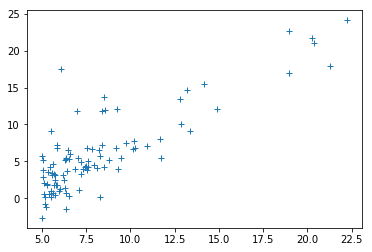

In [4]:
#plot data
plt.plot(X,y,'+')
plt.show()

In [12]:
#train the model
linReg=ULR(X,y)
alpha=0.01
iters=1500
j_h=linReg.GradientDescent(alpha,iters)
print('Parameters: ',linReg.Theta)

Parameters:  [[-3.63029144]
 [ 1.16636235]]


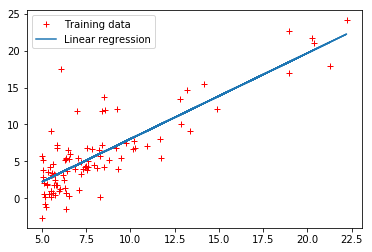

In [13]:
#plot the linear fir
plt.figure(1)
plt.plot(X,y,'r+',label='Training data')
plt.plot(X,np.dot(np.column_stack((np.ones((X.shape[0],1)),X)),linReg.Theta),'-',label='Linear regression')
plt.legend()
plt.show()

In [14]:
#predict
print('For population = 150,000, we predict a profit of ',linReg.predict(15)*10000)
print('For population = 75,000, we predict a profit of ',linReg.predict(7.5)*10000)

For population = 150,000, we predict a profit of  [[ 138651.43815629]]
For population = 75,000, we predict a profit of  [[ 51174.26188113]]


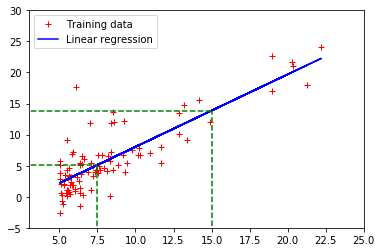

In [15]:
#plot predicted values
plt.ylim(-5,30)
plt.xlim(3,25)
plt.plot(X,y,'r+',label='Training data')
plt.plot(X,np.dot(np.column_stack((np.ones((X.shape[0],1)),X)),linReg.Theta),'b-',label='Linear regression')
plt.plot([7.5, 7.5], [-6, float(linReg.predict(7.5))],'g--')
plt.plot([0, 7.5], [float(linReg.predict(7.5)), float(linReg.predict(7.5))],'g--')
plt.plot([15, 15], [-6, float(linReg.predict(15))],'g--')
plt.plot([0, 15], [float(linReg.predict(15)), float(linReg.predict(15))],'g--')
plt.legend()
plt.show()

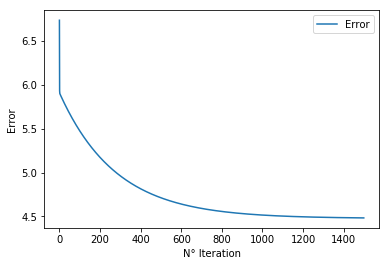

In [16]:
#plot j history
plt.plot(range(iters),j_h,label='Error')
plt.xlabel('N° Iteration')
plt.ylabel('Error')
plt.legend()
plt.show()

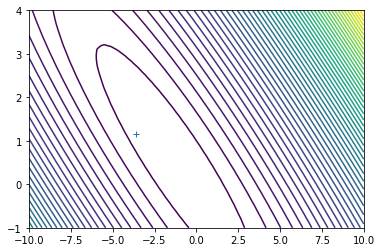

In [17]:
#plot parameters 
theta0_vals=np.linspace(-10,10)
theta1_vals=np.linspace(-1,4)
LR=ULR(X,y)

J_vals=np.zeros((len(theta0_vals),len(theta1_vals)))

for i in range(len(theta0_vals)):
    for j in range(len(theta1_vals)):
        LR.Theta= [theta0_vals[i],theta1_vals[j]]
        J_vals[i][j]=LR.costFunction()
        
plt.contour(theta0_vals, theta1_vals, J_vals,50)
plt.plot(linReg.Theta[0],linReg.Theta[1],'+')
plt.show()